# Архитектура систем классификации

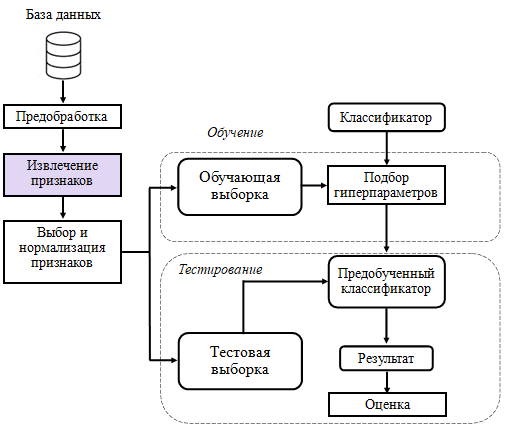

In [ ]:
import numpy as np


## Мешок слов (Bag of Words, BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#корпус предобработанных текстов
Db = ['Вася любить кот',
      'Кот жить улица',
      'Кот любить рыба']

In [ ]:
#векторизуем сразу весь корпус
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Db).toarray()
X

array([[1, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0]])

In [ ]:
#в предобученный векторизатор подаем новый текст
vectorizer.transform(['кот','собака']).toarray()

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Db = ['Вася любит кот',
      'Кот жить улица',
      'Кот любить рыба']

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Db).toarray()
X

array([[0.65249088, 0.        , 0.38537163, 0.65249088, 0.        ,
        0.        , 0.        ],
       [0.        , 0.65249088, 0.38537163, 0.        , 0.        ,
        0.        , 0.65249088],
       [0.        , 0.        , 0.38537163, 0.        , 0.65249088,
        0.65249088, 0.        ]])

## Word2Vec

In [ ]:
!pip install gensim > None

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [22]:
import gensim.downloader as api

word2vec-ruscorpora-300 - word2vec обученный на Russian National Corpus (~ 250M слов), SkipGram с окном 10

В модели "word2vec-ruscorpora-300" после слова указывается часть речи: NOUN (существительное), ADJ (прилагательное) и так далее.

[Другие предобученные эмбеддинги gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

In [ ]:
#загрузка предобученную модель
wv = api.load('word2vec-ruscorpora-300')

[==================================================] 100.0% 198.8/198.8MB downloaded


In [ ]:
#список слов в данной модели
list(wv.index_to_key)[:10]

['весь_DET',
 'человек_NOUN',
 'мочь_VERB',
 'год_NOUN',
 'сказать_VERB',
 'время_NOUN',
 'говорить_VERB',
 'становиться_VERB',
 'знать_VERB',
 'самый_DET']

In [ ]:
len(list(wv.index_to_key))

184973

In [ ]:
#получение вектора w2v по слову
#print(wv['человек_NOUN'])
wv['человек_NOUN'].shape

(300,)

In [ ]:
#создание списка слов без частей речи
vocab = []
for w in list(wv.index_to_key):
  vocab.append(w.split('_')[0])

In [ ]:
vocab[:10]

['весь',
 'человек',
 'мочь',
 'год',
 'сказать',
 'время',
 'говорить',
 'становиться',
 'знать',
 'самый']

In [ ]:
#вектора каждого слова из предложения
preprocessing_text = ['кот', 'любить', 'тыгыдыкать']
vectors_word = []
for i in preprocessing_text:
  if i in vocab:
    #vocab.index(i) - находит идекс в vocab
    #list(wv.index_to_key)[vocab.index(i)] - выводит слово с его частью речи
    #wv[list(wv.index_to_key)[vocab.index(i)]] - получаем вектор
    vectors_word.append(wv[list(wv.index_to_key)[vocab.index(i)]])
  else:
    vectors_word.append(np.zeros(300))
vector_text = np.mean(vectors_word, axis = 0)

In [ ]:
print(vectors_word)

[array([-1.52633622e-01, -6.22178875e-02,  8.02985206e-02,  3.76203880e-02,
       -8.09977110e-03, -6.56392053e-02,  5.08799739e-02,  6.61313012e-02,
        1.57197528e-02,  9.78986733e-03,  4.73552682e-02, -2.55929027e-02,
        1.05717339e-01, -2.22761724e-02,  5.41505031e-02, -3.82993110e-02,
        5.26556484e-02,  1.17264939e-02, -1.46230776e-02, -1.95544884e-02,
        5.04205190e-02, -3.71097960e-02,  3.57442684e-02,  4.96631972e-02,
       -5.57994805e-02, -3.11674438e-02, -2.20739599e-02,  1.07113965e-01,
       -9.91705209e-02, -4.57583293e-02, -9.96095166e-02,  4.80931476e-02,
       -1.33494905e-03,  3.51430699e-02,  2.42795311e-02, -2.34595835e-02,
        5.17160492e-03, -2.06816625e-02,  4.38127927e-02, -3.31711844e-02,
       -2.07874626e-02,  6.72167316e-02, -7.74500072e-02,  2.93545369e-02,
       -1.46178985e-02,  4.10723649e-02,  8.69638026e-02, -3.46537703e-03,
        3.90354246e-02, -2.03978154e-03,  5.43198660e-02,  7.57279024e-02,
        1.48434611e-02, 

In [ ]:
print(vector_text)

[-7.23793755e-02 -3.65346049e-03  1.49774142e-02  7.54638544e-03
 -1.19348569e-02 -2.31060667e-02  9.22187977e-03  9.52869281e-03
 -2.23265849e-02 -3.11003129e-03 -7.76530926e-03 -2.89029796e-02
  5.83873466e-02  2.21828558e-03  1.23262753e-02 -1.62550230e-02
  3.03303512e-02  1.29657254e-02 -3.85678171e-03 -1.78095748e-02
 -7.83780590e-03 -1.12617649e-02  1.16164486e-03  3.36692544e-02
 -2.79939914e-02 -2.76326823e-02 -1.60648624e-02  4.04443393e-02
 -3.67421086e-02 -6.21415352e-02 -3.01132913e-02  9.18867315e-03
  1.09648821e-02  4.99091111e-03  1.44553122e-02  1.99584290e-03
  4.19224147e-04 -1.34673944e-02  5.92786819e-03 -2.35241229e-02
  1.33819568e-02  1.89528183e-02 -3.25611023e-02 -3.45706878e-03
  3.19507591e-02  1.03188014e-02  1.94315246e-02 -1.94793034e-02
  2.81751975e-02 -3.38965377e-02 -1.26512274e-02  6.02087354e-02
  2.44842845e-02  2.13540588e-02 -2.02998444e-02  1.05534028e-03
 -3.11313610e-02 -1.36962188e-02 -7.87467708e-02  3.21254351e-03
  8.54042483e-03 -3.51230

In [ ]:
#размерность вектора для одного текста (любое кол-во слов) будет 300
vector_text.shape

(300,)

# Домашнее задание

1. Использовать предобработанные тексты выбранного корпуса
2. Извлечь вектора BoW, TF-IDF, Word2Vec
3. *Сохранить полученные вектора отдельным файлом (.npy / .csv)
4. ** Предсказать сентимент отзывов используя тональные словари
** - по желанию

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim.downloader as api
from collections import defaultdict

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Загружаем датасет
data = pd.read_csv('/content/drive/MyDrive/posts_IS_cleaned.csv')

In [16]:
# Извлекаем предобработанные тексты
corpus = data["text"].astype(str).tolist()

In [18]:
# BoW (Bag of Words)
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(corpus)
X_bow_dense = X_bow.toarray()

In [40]:
print("Форма матрицы:", X_bow.shape)
print("Первые 5 строк BoW-матрицы:")
print(X_bow_dense[:5])

Форма матрицы: (9142, 24643)
Первые 5 строк BoW-матрицы:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
X_tfidf_dense = X_tfidf.toarray()

In [31]:
print("Форма матрицы:", X_bow_dense.shape)
print("Первые 5 строк BoW-матрицы:")
print(X_bow_dense[:5])

Форма матрицы: (9142, 24643)
Первые 5 строк BoW-матрицы:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
# Word2Vec
# Загружаем предобученную модель
wv = api.load('word2vec-ruscorpora-300')

[==================================================] 100.0% 198.8/198.8MB downloaded


In [24]:
# Подготовим список слов (без части речи)
vocab = []
for w in list(wv.index_to_key):
    vocab.append(w.split('_')[0])

vocab_set = set(vocab)

In [25]:
def text_to_w2v_vector(text):
    tokens = text.split()
    vectors = []
    for token in tokens:
        if token in vocab_set:
            full_word = wv.index_to_key[vocab.index(token)]
            vectors.append(wv[full_word])
        else:
            vectors.append(np.zeros(300, dtype=np.float32))
    if len(vectors) == 0:
        return np.zeros(300, dtype=np.float32)  # если совсем нет слов
    return np.mean(vectors, axis=0)

In [26]:
# Применяем к каждому документу (каждому посту)
X_w2v = []
for text in corpus:
    vec = text_to_w2v_vector(text)
    X_w2v.append(vec)

# Преобразуем в numpy-массив
X_w2v = np.array(X_w2v)
print("Форма Word2Vec-массива:", X_w2v.shape)

Форма Word2Vec-массива: (9142, 300)


In [37]:
print(X_w2v[:5])

[[ 7.22003682e-03  4.84651281e-03  6.99223112e-03 ...  2.12608855e-02
  -2.95639690e-02 -3.09512648e-03]
 [ 4.11289977e-03 -6.38298737e-03 -6.06956566e-03 ...  5.56619931e-03
  -3.32856253e-02 -1.86925866e-02]
 [ 6.01937342e-03 -9.82913189e-03 -1.09116752e-02 ...  1.34637440e-02
  -3.29691023e-02 -1.24787735e-02]
 [ 2.20667776e-02 -4.77396976e-03  2.95607260e-05 ...  1.58626661e-02
  -3.72815058e-02 -5.92015916e-03]
 [ 2.49236245e-02 -8.24926514e-03 -1.38073089e-02 ...  1.03889788e-02
  -3.37651074e-02 -2.34523937e-02]]


In [38]:
# Сохранение векторов
np.save("/content/drive/MyDrive/bow_vectors.npy", X_bow_dense)
np.save("/content/drive/MyDrive/tfidf_vectors.npy", X_tfidf_dense)
np.save("/content/drive/MyDrive/w2v_vectors.npy", X_w2v)

print("Вектора BoW, TF-IDF, Word2Vec сохранены как .npy файлы.")

Вектора BoW, TF-IDF, Word2Vec сохранены как .npy файлы.
